# Analysis Summary: Acute Inflammations Dataset

This report outlines the analysis conducted on the Acute Inflammations dataset specifically designed for testing an expert system aimed at the presumptive diagnosis of two urinary system diseases: acute inflammations of the urinary bladder and acute nephritises. Developed by a medical expert, this dataset embodies the intersection of healthcare and machine learning, offering insights into the diagnosis process through data-driven methods.

## Dataset Overview

The dataset, sourced from the UCI Machine Learning Repository, encapsulates 120 instances characterized by six main attributes alongside two decision attributes indicating the presence of the diseases. It serves as a testbed for an algorithm designed to emulate medical diagnostic procedures.

## Methodology

### Data Acquisition

- The dataset was downloaded from the [UCI Machine Learning Repository's Acute Inflammations page](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

### Decision Trees as Interpretable Models

- A decision tree was constructed using the entire dataset, providing a graphical representation of the diagnostic logic.
- The decision rules derived from the tree were then translated into a set of IF-THEN rules, enhancing the interpretability and applicability of the findings.
- Cost-complexity pruning was employed to refine the decision tree, aiming for a balance between simplicity and diagnostic accuracy.

## Results and Observations

- The analysis yielded an interpretable model capable of diagnosing acute inflammations of the urinary bladder and acute nephritises with reasonable accuracy.
- The IF-THEN rules extracted offer a clear and concise methodology for preliminary diagnosis, potentially serving as a valuable tool for medical practitioners.

## Conclusion

The exploration of the Acute Inflammations dataset through decision tree analysis has demonstrated the potential of machine learning techniques in augmenting medical diagnostics. The development of an expert system based on the findings could significantly aid in the rapid and accurate diagnosis of urinary system diseases, showcasing the vital role of data analytics in healthcare.



# Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn import tree
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Load data

In [33]:
df = pd.read_csv('../data/diagnosis.data', sep='\s+', encoding='UTF_16', header=None, decimal=',')
df.columns = ["a1", "a2", "a3", "a4", "a5", "a6", "d1", "d2"]
df.head()

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


# Building a decision tree

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

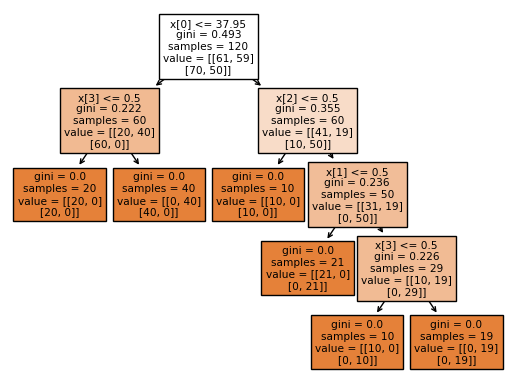

In [34]:
# Transform df to binary
for column in ['a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Specify X and y
X = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6']]
y = df[['d1', 'd2']]

# Decision tree classifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
tree.plot_tree(clf, filled=True)

# Converting the decision rules

In [35]:
# Here each if then statement will be presented in the order that the decision tree follows
condition = "x[0] <= 37.95 and x[2] <= 0.5"
outcome = "[[0, 40], [40, 0]]"
rule_1 = f"IF {condition} THEN Class = {outcome}"
print(rule_1)

condition = "x[0] <= 37.95 and x[2] > 0.5"
outcome = "[[20, 0], [20, 0]]"
rule_2 = f"IF {condition} THEN Class = {outcome}"
print(rule_2)

condition = "x[0] > 37.95 and x[2] <= 0.5"
outcome = "[[10, 0], [10, 0]]"
rule_3 = f"IF {condition} THEN Class = {outcome}"
print(rule_3)

condition = "x[0] > 37.95 and x[2] > 0.5 and x[1] <= 0.5"
outcome = "[[21, 0], [0, 21]]"
rule_4 = f"IF {condition} THEN Class = {outcome}"
print(rule_4)

condition = "x[0] > 37.95 and x[2] > 0.5 and x[1] > 0.5 and x[3] <= 0.5"
outcome = "[[10, 0], [0, 10]]"
rule_5 = f"IF {condition} THEN Class = {outcome}"
print(rule_5)

condition = "x[0] > 37.95 and x[2] > 0.5 and x[1] > 0.5 and x[3] > 0.5"
outcome = "[[0, 19], [0, 19]]"
rule_6 = f"IF {condition} THEN Class = {outcome}"
print(rule_6)

IF x[0] <= 37.95 and x[2] <= 0.5 THEN Class = [[0, 40], [40, 0]]
IF x[0] <= 37.95 and x[2] > 0.5 THEN Class = [[20, 0], [20, 0]]
IF x[0] > 37.95 and x[2] <= 0.5 THEN Class = [[10, 0], [10, 0]]
IF x[0] > 37.95 and x[2] > 0.5 and x[1] <= 0.5 THEN Class = [[21, 0], [0, 21]]
IF x[0] > 37.95 and x[2] > 0.5 and x[1] > 0.5 and x[3] <= 0.5 THEN Class = [[10, 0], [0, 10]]
IF x[0] > 37.95 and x[2] > 0.5 and x[1] > 0.5 and x[3] > 0.5 THEN Class = [[0, 19], [0, 19]]


# Using cost-complexity pruning to find a minimal decision tree with a set of interpretable decision rules

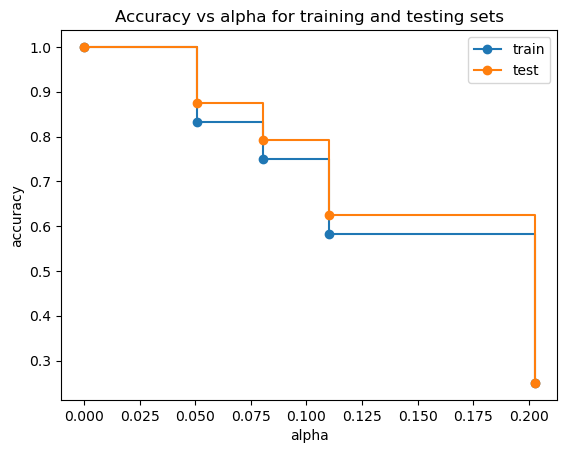

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)

# Compute the effective alphas for each split of the decision tree. Represent the cost of adding an additional leaf to the tree.
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Iterate over each alpha and train a decision tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate how well each pruned tree performs
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Find the tree with the highest test accuracy
max_test_score_index = test_scores.index(max(test_scores))
best_tree = clfs[max_test_score_index]


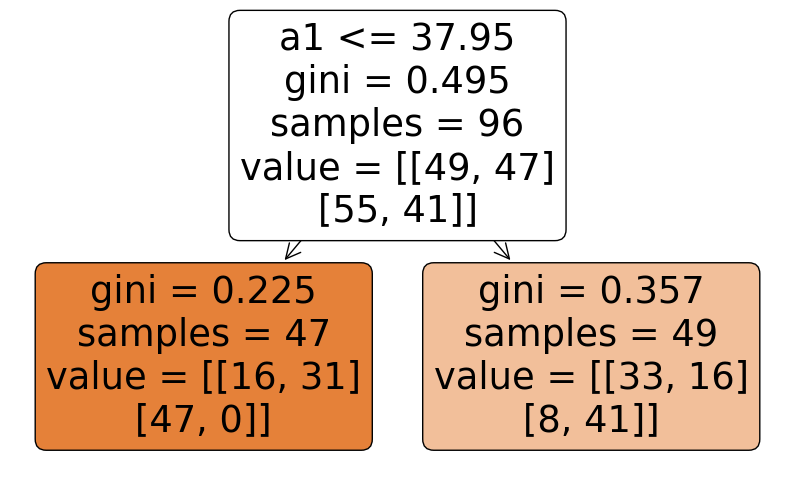

In [37]:
# Adjusting parameters to find a minimal decision tree and a set of decision rules with high interpretability.
minimal_tree = DecisionTreeClassifier(random_state=0,
    ccp_alpha=0.2,
    min_samples_split=40,   
    min_samples_leaf=20     
)

minimal_tree.fit(X_train, y_train)

# minimal decision tree graph
fig, ax = plt.subplots(figsize=(10, 6))
plot_tree(minimal_tree, filled=True, ax=ax, impurity=True, rounded=True, feature_names=X.columns)
plt.show()

In [38]:
# Print set of decision rules with high interpretability
condition = "a1 <= 37.95"
outcome = "[[16, 31], [47, 0]]"
left = f"IF {condition} THEN Class = {outcome}"
print(left)

condition = "a1 > 37.95"
outcome = "[[33, 16], [8, 41]]"
right = f"IF {condition} THEN Class = {outcome}"
print(right)

IF a1 <= 37.95 THEN Class = [[16, 31], [47, 0]]
IF a1 > 37.95 THEN Class = [[33, 16], [8, 41]]


In [39]:
df_communities = pd.read_csv('../data/communities.csv', header=None)
atrributes = [
    "state", "county", "community", "communityname", "fold", "population",
    "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
    "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban",
    "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
    "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap",
    "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
    "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
    "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8",
    "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup",
    "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacantMore6Mos", "MedYrHousBuilt", "PctHousNoPhone",
    "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ",
    "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc",
    "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz",
    "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop",
    "ViolentCrimesPerPop"
]

df_communities.columns = atrributes